this projet we will explore the finaciial data that is genrated for fraud detection and recesrch in fincial markets 

the aim of this project is to explore the data and do pre processing to make it usebel for training an actual model 


roadmap followed in this project 

1) perform data exploration and cleaning using numpy and pandas
2) perfrom exploratory anylisis and visulization using matplotlib and seborn 
3) ask questions about data and answer them 
4) summrize your findings and write a conclusion 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("student_habits_performance.csv")

In [3]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
data.shape

(1000, 16)

In [6]:
# drop irrelevent colums 

#data = data.drop(['Accident Date','Junction_Detail','Local_Authority_(District)','Police_Force'],axis = 1)

In [7]:
# drop duplicate rows 
duplicate_data = data[data.duplicated()]
print(duplicate_data)

Empty DataFrame
Columns: [student_id, age, gender, study_hours_per_day, social_media_hours, netflix_hours, part_time_job, attendance_percentage, sleep_hours, diet_quality, exercise_frequency, parental_education_level, internet_quality, mental_health_rating, extracurricular_participation, exam_score]
Index: []


In [8]:
# drop null valuse 
#check for null values 

print(data.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [9]:
# drop null values 
data = data.dropna()
data.count()


student_id                       909
age                              909
gender                           909
study_hours_per_day              909
social_media_hours               909
netflix_hours                    909
part_time_job                    909
attendance_percentage            909
sleep_hours                      909
diet_quality                     909
exercise_frequency               909
parental_education_level         909
internet_quality                 909
mental_health_rating             909
extracurricular_participation    909
exam_score                       909
dtype: int64

In [10]:
print(data.isnull().sum())


student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [11]:
#seprating catagorical colums from numarical colums for easer visulization 

cat_col = data.select_dtypes(include = ['object']).columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id') # student id is saved as object but its actually a numarical value 
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

In [12]:
# printing the numrical data so its easer for us to visuvlize later 

num_col = data.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

at this point data is cleaned of duplicate values , unwanted colums and null values now we will proceed to make graphs and detect outliers and then try to remove them 

after that make correlation plots  that will help in data exploration 

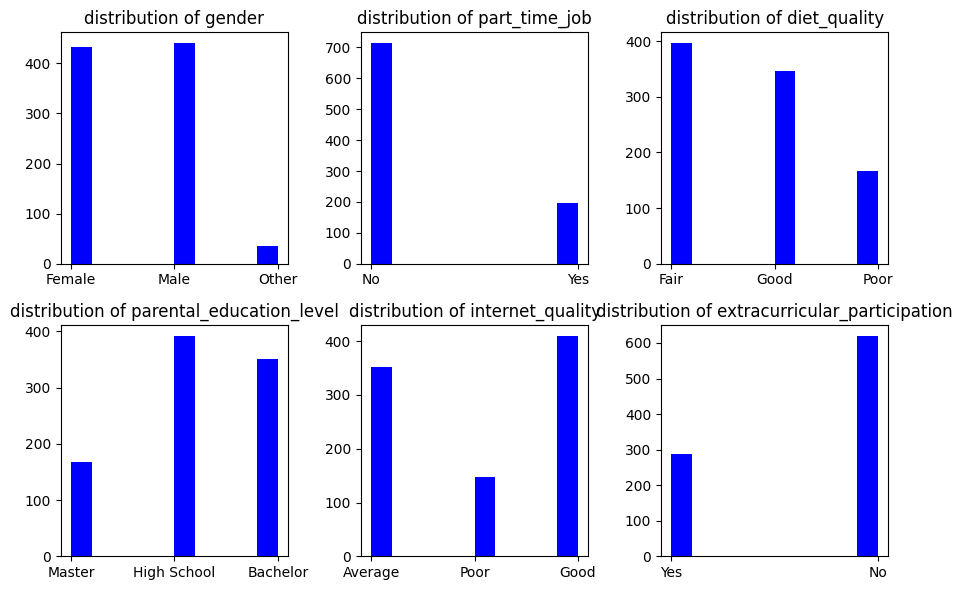

In [13]:
# visuvlise catagorical data 

plt.figure(figsize=(9,6))

for i in range(6):
    plt.subplot(2, 3,i+1)
    plt.hist(data[cat_col[i]], color='blue')
    plt.title(f"distribution of {cat_col[i]}")

plt.tight_layout()
plt.show()

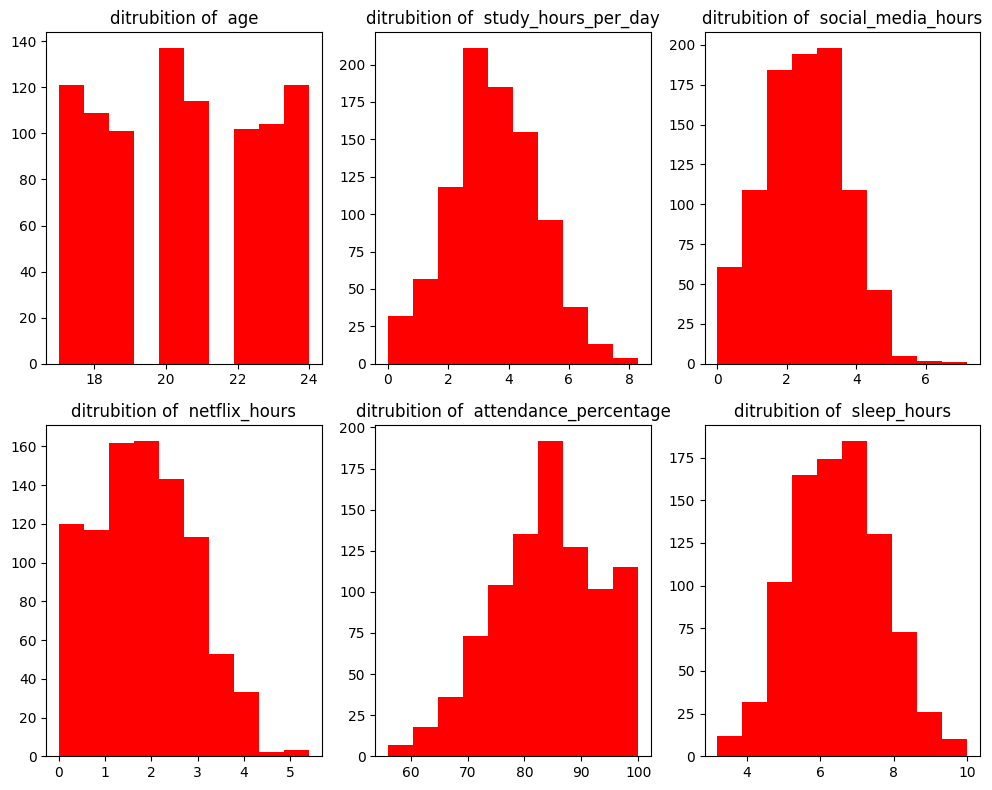

In [14]:
plt.figure(figsize=(10,8)) # define lenght and width of the figure 


for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(data[num_col[i]], color = "red")
    plt.title(f"ditrubition of  {num_col[i]}")

plt.tight_layout()
plt.show()

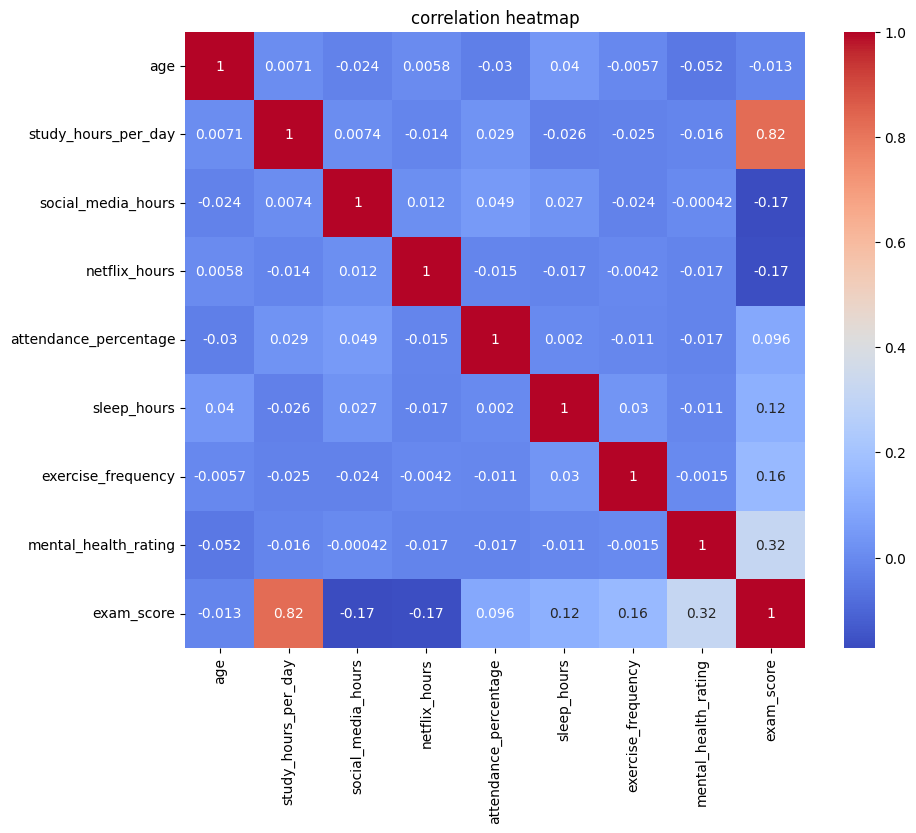

In [15]:
# correlation heatmap 
# haetmap is only used for numeric data 

plt.figure(figsize=(10,8))

sns.heatmap(data.corr(numeric_only = True),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

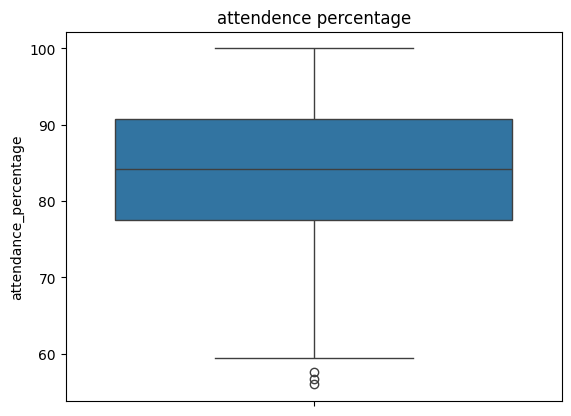

In [16]:
# boxplot also help us identiphy outliers in numarical colums 

sns.boxplot(y=data['attendance_percentage'])
plt.title("attendence percentage")
plt.show()

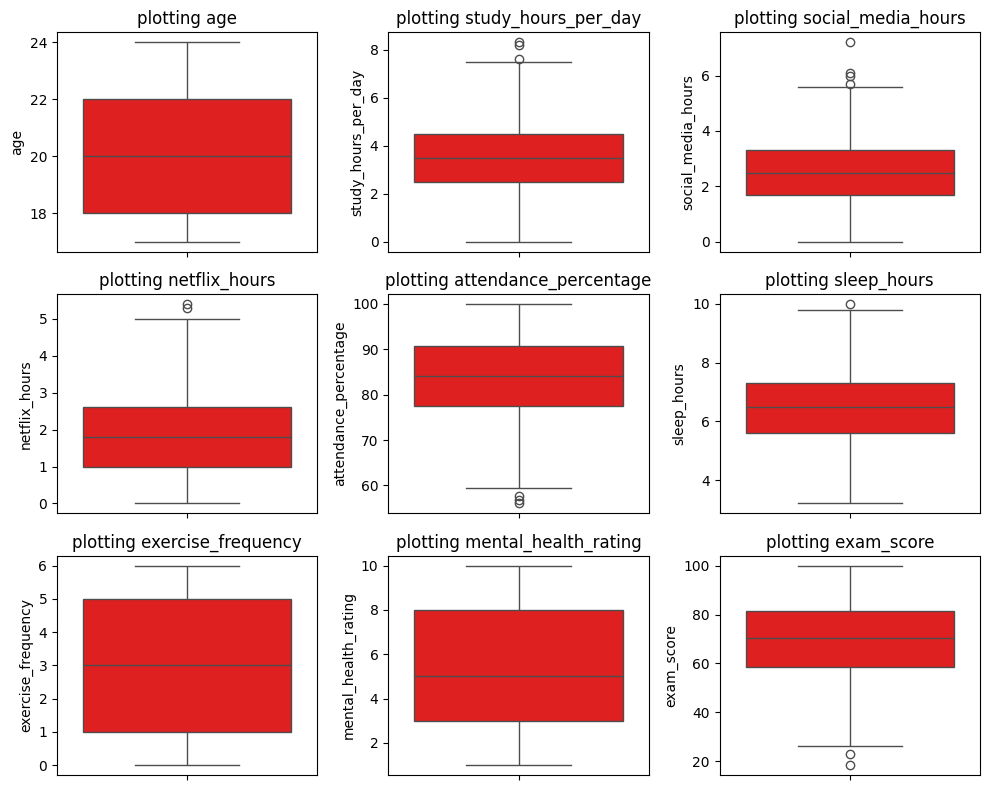

In [17]:
plt.figure(figsize=(10,8))
num_col = data.select_dtypes(include='number')


for i , col in enumerate(num_col):
    plt.subplot(3,3,i + 1)
    sns.boxplot(y = data[col], color='red')
    plt.title(f"plotting {col}")

plt.tight_layout()
plt.show()

In [18]:
# we saw in the above boxplot that there are some outliers in some colums we will removw those so that 
# when we trin our model it is free of noise and thay dont cause problems in its predication 

q1 = num_col.quantile(0.25)
q3 = num_col.quantile(0.75)

iqr = q3-q1

print(iqr)

age                       4.0
study_hours_per_day       2.0
social_media_hours        1.6
netflix_hours             1.6
attendance_percentage    13.2
sleep_hours               1.7
exercise_frequency        4.0
mental_health_rating      5.0
exam_score               22.9
dtype: float64


In [20]:
# remove outliers 
data.shape


(909, 16)

In [28]:
num_col = num_col.mask[((num_col<(q1 - 1.5 * iqr)) | (num_col > (q3 + 1.5 * iqr)))]

TypeError: 'method' object is not subscriptable

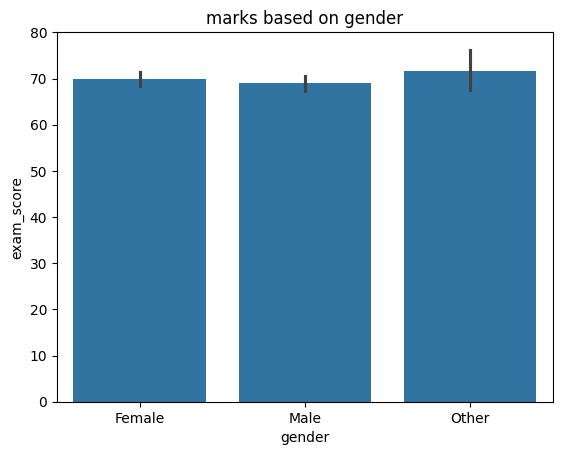

In [ ]:
sns.barplot(x=data['gender'], y=data['exam_score'])
plt.title("marks based on gender")
plt.show()

# this graph tell us that gender is not a dominat factor in student marks as all students form diffrent gender have almost same marks 

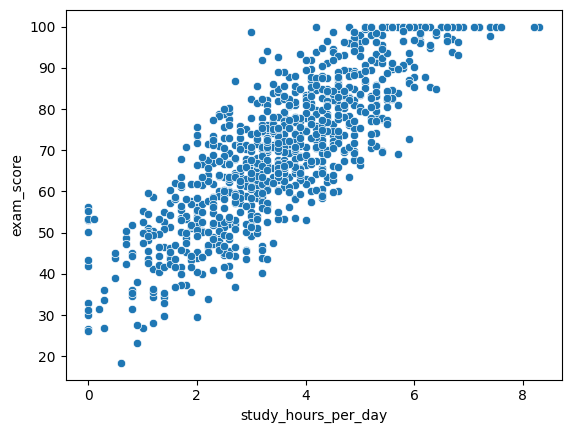

In [41]:
sns.scatterplot(x=data['study_hours_per_day'], y = data['exam_score'])
plt.show()

study hours is a big factor 


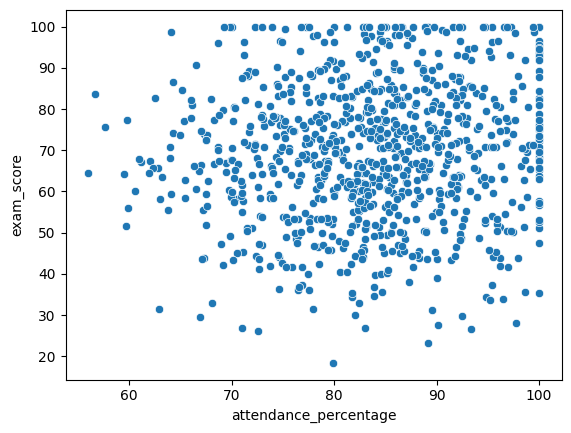

In [45]:
sns.scatterplot(x=data['attendance_percentage'], y = data['exam_score'])
plt.show()

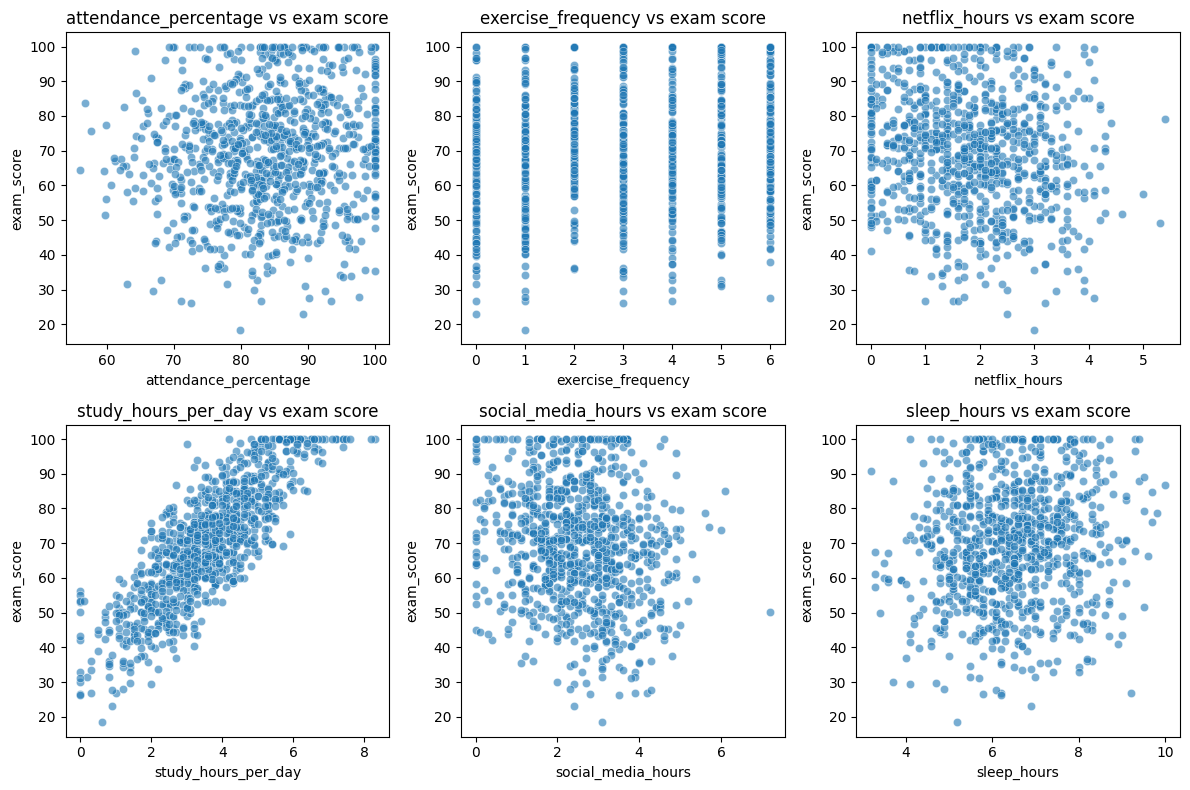

In [55]:
# plloting exam score against diffrent features 

features = ['attendance_percentage','exercise_frequency','netflix_hours','study_hours_per_day','social_media_hours','sleep_hours']
plt.figure(figsize=(12,8))



for i,feature in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=data[feature],y=data['exam_score'],alpha=0.6)
    plt.title(f"{feature} vs exam score")

plt.tight_layout()
plt.show()

# this help us know how diffrent faetures affect exam score 

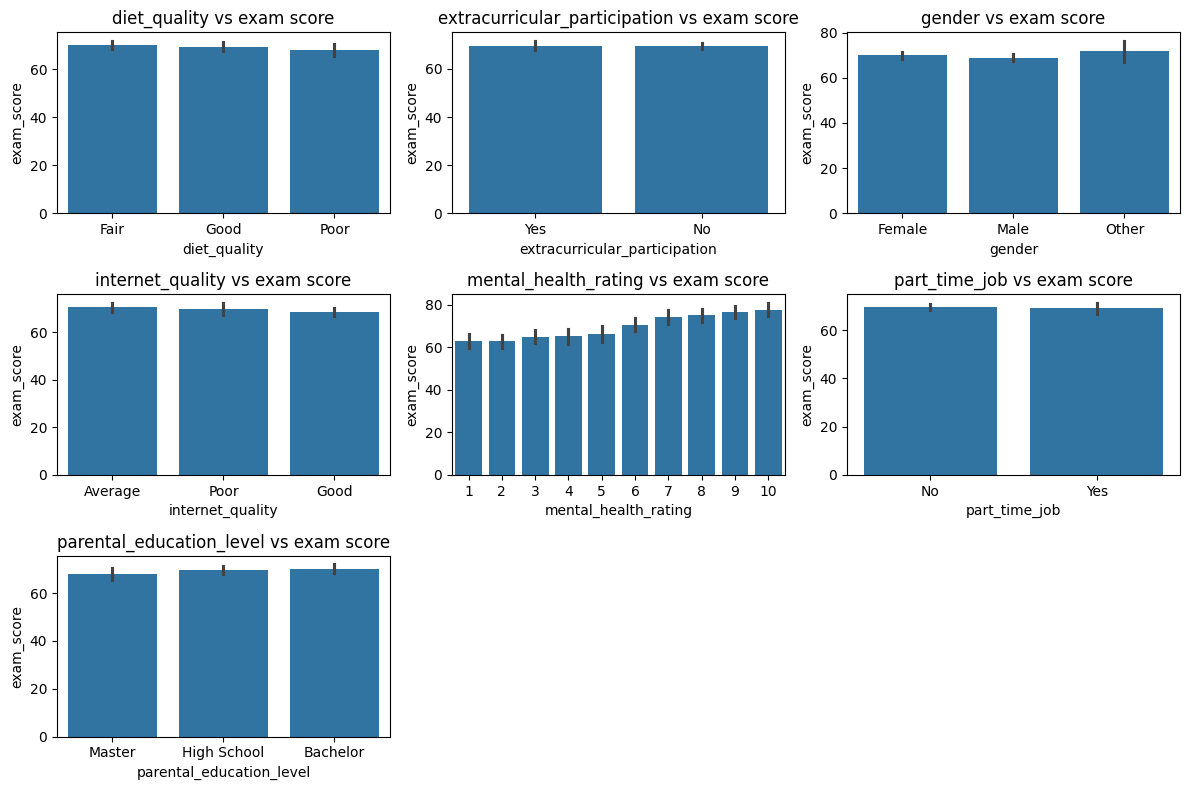

In [ ]:
catagorys = ['diet_quality','extracurricular_participation','gender','internet_quality','mental_health_rating','part_time_job','parental_education_level']

plt.figure(figsize=(16,12))

for i , catagory in enumerate(catagorys):
    plt.subplot(3,3,i+1)
    sns.barplot(x=data[catagory],y=data['exam_score'])
    plt.title(f"{catagory} vs exam score")

plt.tight_layout()
plt.show()

# this shows that other than mental helth rating nothing else really affect the score of students that much 

so movieng forword the numatical features are more imp for training 

footnotes 

* try not to use the varibel name which is used to store data for anything else or esle it will throw error like data is sacler ets 
avoid 

data = data['colum_name'].mean()

it will overwrite dataset without warnings 

num_cols = data.select_dtypes(include='number').columns
plt.figure(figsize=(10,8))

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()




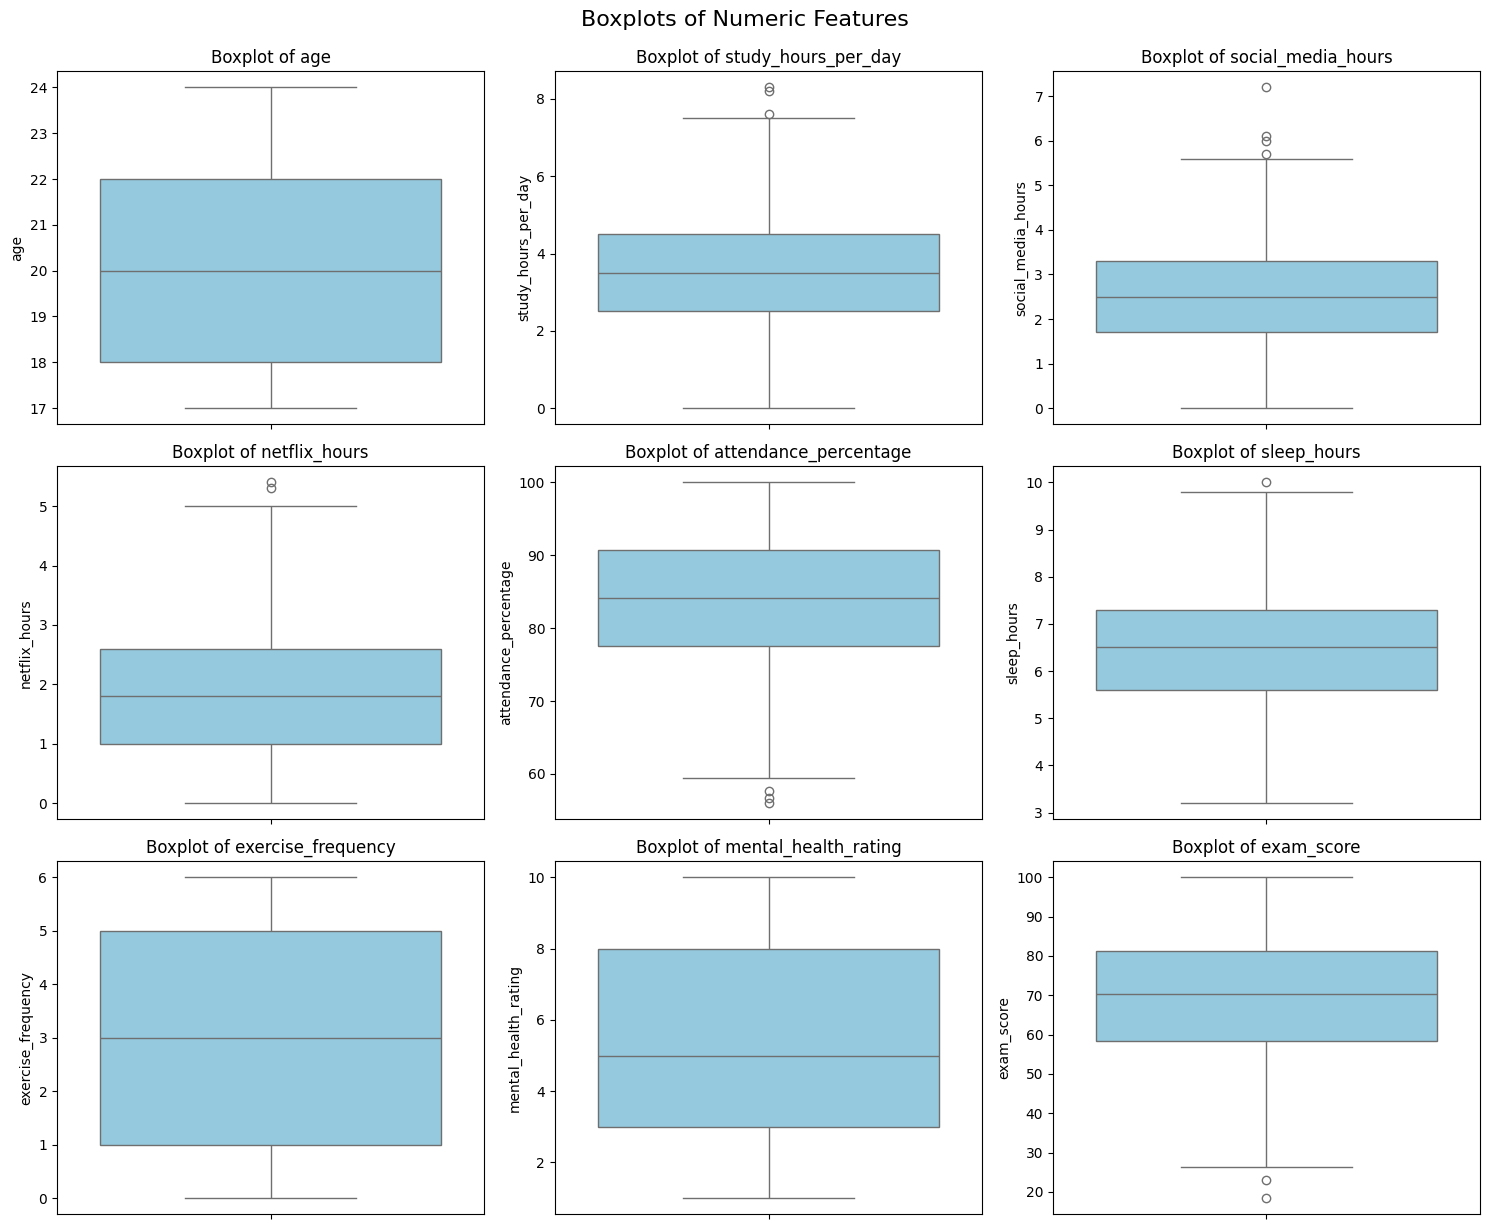

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_data = data.select_dtypes(include='number')
num_cols = num_data.columns

# Set up the grid size dynamically
n_cols = 3  # Number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate required rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust the figure size as needed

# Loop through each numeric column and plot in its own subplot
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.suptitle("Boxplots of Numeric Features", fontsize=16, y=1.02)
plt.show()


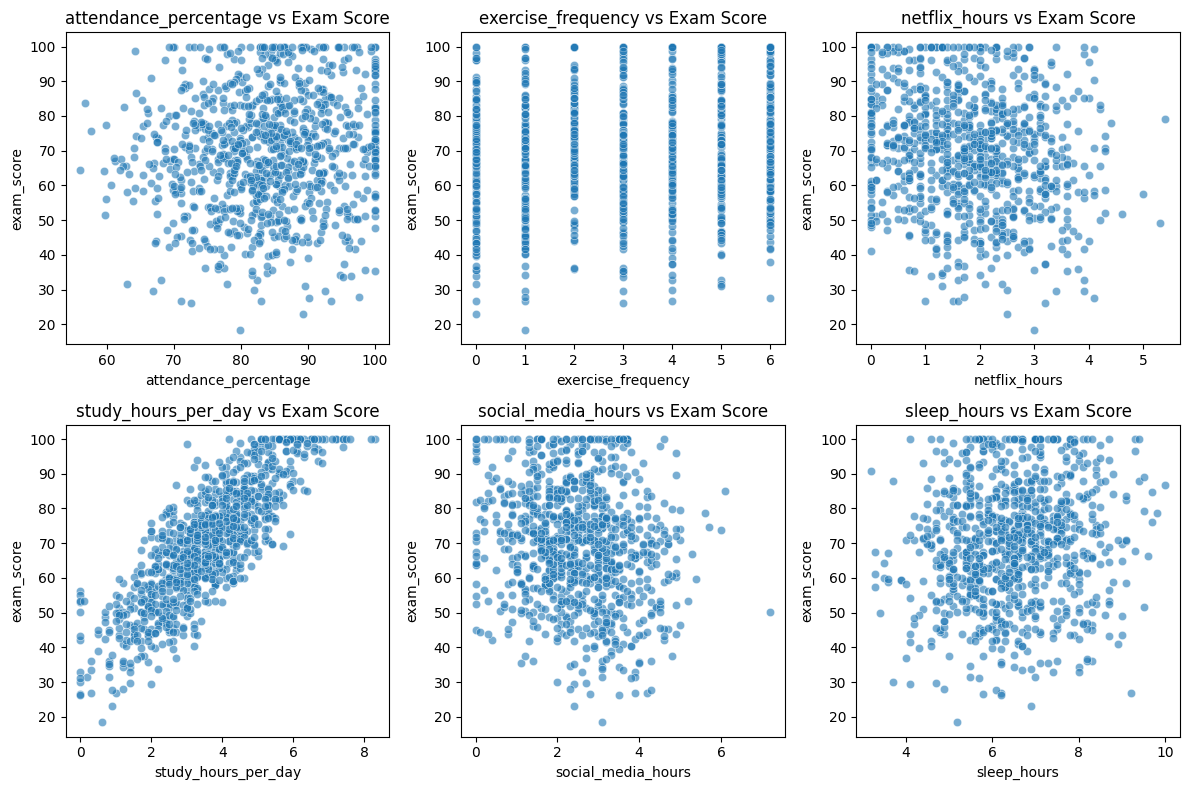

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['attendance_percentage','exercise_frequency','netflix_hours',
            'study_hours_per_day','social_media_hours','sleep_hours']

plt.figure(figsize=(12,8))  # Adjust figure size for clarity

for i, feature in enumerate(features):  # Fix variable naming
    plt.subplot(2,3,i+1)  # Using a 2-row, 3-column layout to fit all features
    sns.scatterplot(x=data[feature], y=data['exam_score'], alpha=0.6)
    plt.title(f"{feature} vs Exam Score")  # Fix title formatting

plt.tight_layout()  # Prevent overlapping subplots
plt.show()
